In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import warnings module
import warnings
warnings.filterwarnings("ignore")

# Import libraries for modeling
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
# Version printing
print(f'Pandas version:',pd.__version__)
import sys
print(f'Python version:',sys.version)
import matplotlib
print(f'Matplotlib Version:', matplotlib.__version__)
print(f'Seaborn Version:', sns.__version__)

# Version printing for Sklearn and statsmodel
print(f'sklearn version:',sklearn.__version__)

Pandas version: 2.2.2
Python version: 3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]
Matplotlib Version: 3.10.0
Seaborn Version: 0.13.2
sklearn version: 1.6.1


# **Problem statement**

<b><font color = maroon>Problem Statement</font></b><br>

<p align="justify">X Education is an education company that offers online courses for industry professionals. The company attracts many visitors to its website through various marketing channels. The company faces a problem: its lead conversion rate is very low. Out of 100 leads, only 30 become customers on average.</p>

<p align="justify">To solve this problem, X Education wants to identify the most potential leads, also known as ‘Hot Leads’. The company has hired you to help them with this task. Your job is to build a model that can assign a lead score to each lead based on various factors, such as their demographics, behavior, preferences, etc. The higher the lead score, the more likely the lead is to convert. The lower the lead score, the less likely the lead is to convert. The company’s CEO has set a target of achieving an 80% lead conversion rate with this model.</p>

<b><font color = maroon>Goals and Objective</font></b><br>
- <p align="justify">Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.</p>
- <p align="justify">There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.</p>

**Process**


1.   Data understanding
2.   EDA  
3.   Data preprocessing for modeling
4.   Build models using Logistic Regression.
5.   Model evaluation
6.   Conclusion



# **1. Data understanding**

## **Inspecting data**

In [ ]:
# Import the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Leads.csv')

In [ ]:
# Check the data size
df.shape

(9240, 37)

**It has 9024 data rows with 37 variables**

In [ ]:
# Inspecting the dataframe
pd.options.display.max_columns = None
df.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened


In [ ]:
# Inspecting the distribution of numerical data
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


1. **Converted: binary distribution indicating converted/non-converted status**
2. **Website engagement:**
* **avr. total visit 3.45 per lead suggesting a typical user behavior of 3 visits**
* **Avr. time spend 487 second ~ 8minutes quite high, showing a high interest in the content. However, the range is rather spreading**
* **2.36 avr. page views per visit for a typical behavior, up to max 55 pages**
3. **Acitivity and Profile Score have relatively narrow ranges, suggesting a consistent scoring**


In [ ]:
# Inspect the various aspects of the data dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## **Handling duplicates, redundant and error data**

In [ ]:
# Check for duplicates
df.duplicated().sum()

0

In [ ]:
# Dropping system data that not relevant for modeling
df.drop('Prospect ID', axis=1, inplace=True)

'Select' seems to be the default value stored in the backend for columns that are optional in nature and the prospective lead has chosen not to select any of options available in the dropdown menu.

In [ ]:
# To convert 'Select' values to NaN
df = df.replace('Select', np.nan)

## **Handling missing data > 20%**

In [ ]:
# Check null data
null_df = df.isna().sum()/len(df)*100

# Columns with null data more than 20%
null_df[null_df > 20].sort_values(ascending=False)

,0
How did you hear about X Education,78.463203
Lead Profile,74.188312
Lead Quality,51.590909
Asymmetrique Activity Index,45.649351
Asymmetrique Profile Index,45.649351
Asymmetrique Activity Score,45.649351
Asymmetrique Profile Score,45.649351
City,39.707792
Specialization,36.580087
Tags,36.287879


**We'll drop columns with more than 70% of missing values as it does not make sense to impute these many values**

In [ ]:
df.drop(null_df[null_df > 70].index, axis=1, inplace=True)

#### For other columns, we have to work on column by column basis.  
- For categorical variables, we'll analyse the count/percentage plots.
- For numerical variable, we'll describe the variable and analyse the box plots.

In [ ]:
# Function for percentage plots
def percent_plot(var):
    values = (df[var].value_counts(normalize=True)*100)
    plt_p = values.plot.bar(color=sns.color_palette('deep'))
    plt_p.set(xlabel = var, ylabel = '% in dataset')
    # Add percentage labels on top of bars
    for i, v in enumerate(values):
        plt_p.text(i, v + 0.5, f'{v:.1f}%', ha='center')

**Lead Quality**

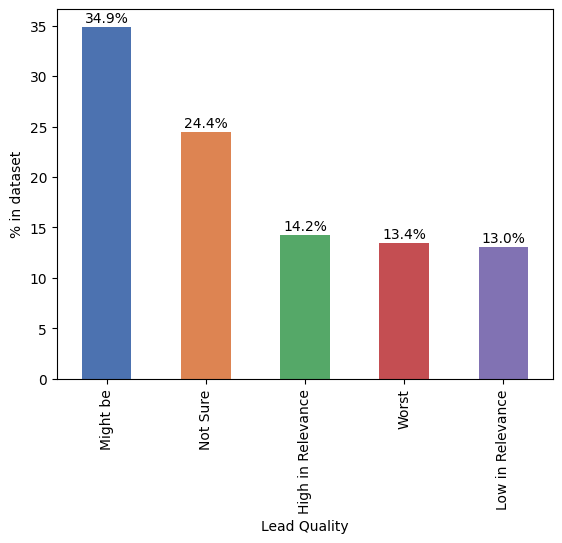

In [ ]:
# Plotting the percent distribution
percent_plot('Lead Quality')

* Indicates the quality of lead based on the data and intuition the employee who has been assigned to the lead
* This is an important metric to keep even though high missing values. The missing values should be imputed with "Unknown" to prevent misleading the data

In [ ]:
# Replacing missing values of Lead Quality with 'Unknown'
df['Lead Quality'] = df['Lead Quality'].replace(np.nan, 'Unknown')

# Checking the values of Lead Quality after replacing
df['Lead Quality'].value_counts()

,count
Lead Quality,
Unknown,4767
Might be,1560
Not Sure,1092
High in Relevance,637
Worst,601
Low in Relevance,583


**Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score**

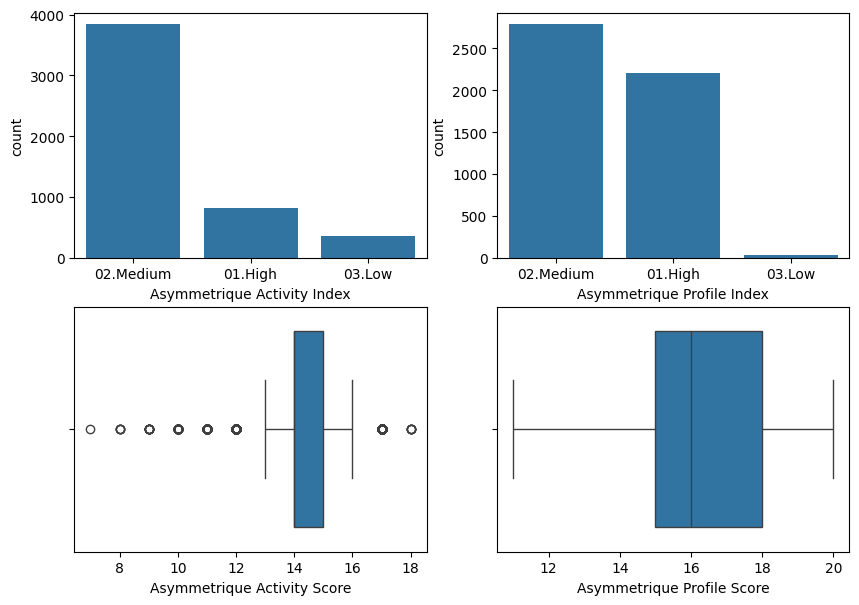

In [ ]:
# For 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'
asym_list = ['Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']
plt.figure(figsize=(10, 7))
for var in asym_list:
    plt.subplot(2,2,asym_list.index(var)+1)
    if 'Index' in var:
        sns.countplot(data=df, x=var)
    else:
        sns.boxplot(data=df, x=var)
plt.show()

* They, all, are an index and score assigned to each customer based on their activity and their profile.
* These four variables have more than 45% missing values and it can be seen from the plots that there is a lot of variation in them.
* With similar measurement purpose, to prevent multicollearity, we should keep one and remove the rest
* We will keep Asymmetrique Activity Index and drop the other three because it's not good to impute 45% for numerical scores. Meanwhile, we can impute the missing category with "Unknown" to preserve the distinction between actual and missing data in the index. Indexing also has a clear High/Med/Low categories

In [ ]:
df.drop(['Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], inplace=True, axis=1)

In [ ]:
# Fill na value of Asymmetrique Activity Index with "Unknown"
df['Asymmetrique Activity Index'].fillna('Unknown', inplace=True)

In [ ]:
df['Asymmetrique Activity Index'].value_counts()

,count
Asymmetrique Activity Index,
Unknown,4218
02.Medium,3839
01.High,821
03.Low,362


**City**

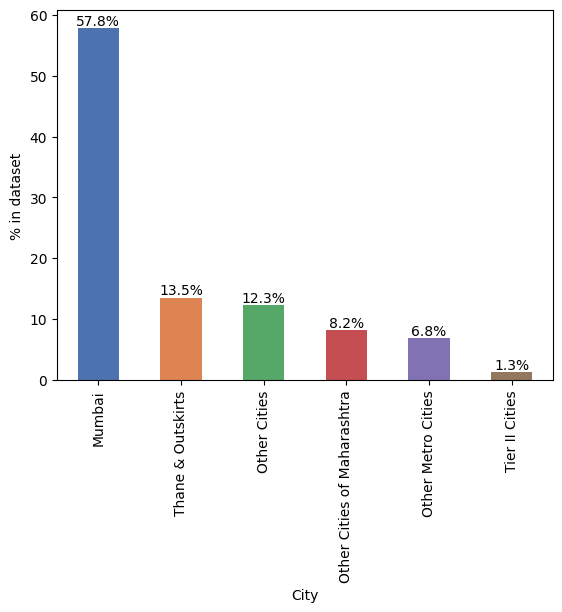

In [ ]:
# Plotting the percent distribution
percent_plot('City')

* City with 40% missing. Around 60% of the City values are Mumbai. We can impute 'Mumbai' in the missing values.

In [ ]:
df['City'] = df['City'].replace(np.nan, 'Mumbai')
df['City'].isnull().sum()

0

**Specialization**

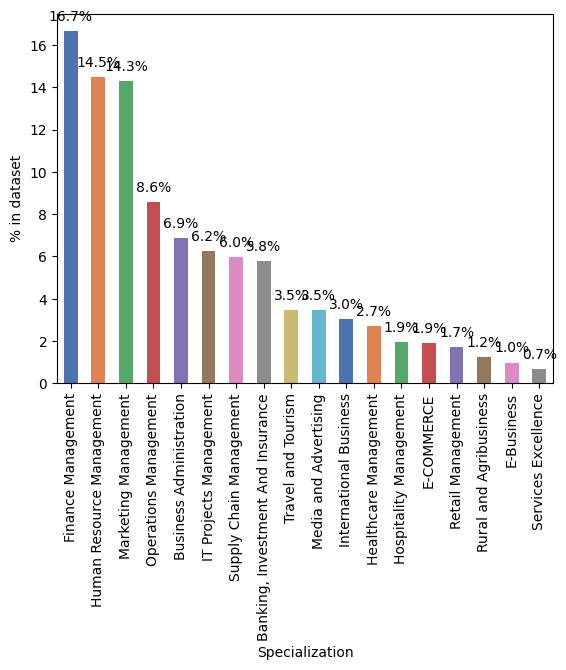

In [ ]:
# Plotting the percent distribution
percent_plot('Specialization')

* There are a lot of different specializations and it's not accurate to directly impute with the mean. It is possible that the person does not have a specialization or his/her specialization is not in the options
* So we will impute the missing values with a new category named "Others"

In [ ]:
df['Specialization'] = df['Specialization'].replace(np.nan, 'Others')
df['Specialization'].isnull().sum()

0

**Tags**

In [ ]:
# Tags assigned to customers indicating the current status of the lead
# The values of variable is rather indicating certain intention to the course taking, similar to Lead Quality
# Checking values of both Tags and Lead Quality
df[['Tags','Lead Quality']].value_counts()

Tags                                               Lead Quality     
Will revert after reading the email                Might be             1117
Ringing                                            Unknown               579
                                                   Not Sure              432
Will revert after reading the email                Low in Relevance      413
                                                   High in Relevance     390
                                                                        ... 
Recognition issue (DEC approval)                   Low in Relevance        1
number not provided                                Low in Relevance        1
In confusion whether part time or DLP              Unknown                 1
                                                   Worst                   1
Want to take admission but has financial problems  Unknown                 1
Name: count, Length: 110, dtype: int64

* More specific information, and therefore, more predicting power than Lead Quality
* 36% missing values is quite critical, but still lower than 51% of Lead Quality
* It may provides additional actionable insights to Lead Quality
* We can impute the missing values with "Unknown"

In [ ]:
# Due to scattering categories, we will group based on the similarities and frequencies
tag_mapping = {
        # Active and potential leads
        'Will revert after reading the email': 'Active_Lead',
        'Ringing': 'Active_Lead',
        'Interested in other courses': 'Active_Lead',
        'Interested in full time MBA': 'Active_Lead',
        'Interested in Next batch': 'Active_Lead',
        'Shall take in the next coming month': 'Active_Lead',

        # Contact problems should give a low lead scoring
        'invalid number': 'Contact_Issue',
        'wrong number given': 'Contact_Issue',
        'number not provided': 'Contact_Issue',
        'opp hangup': 'Contact_Issue',

        # Lost/Closed
        'Lost to EINS': 'Lost_Closed',
        'Lost to Others': 'Lost_Closed',
        'Closed by Horizzon': 'Lost_Closed',
        'switched off': 'Lost_Closed',
        'Busy': 'Lost_Closed',

        # Current Students
        'Already a student': 'Current_Student',
        'Graduation in progress': 'Current_Student',
        'Lateral student': 'Current_Student',

        # Not Interested
        'Not doing further education': 'Not_Interested',

        # Others: not eligible, still considering, confusing or constraint
        'Diploma holder (Not Eligible)': 'Others',
        'University not recognized': 'Others',
        'Recognition issue (DEC approval)': 'Others',
        'Still Thinking': 'Others',
        'In confusion whether part time or DLP': 'Others',
        'Want to take admission but has financial problems': 'Others',

        # Unknown
        np.nan: 'Unknown',
        'Unknown': 'Unknown'
    }

df['Tags'] = df['Tags'].map(tag_mapping)
df['Tags'] = df['Tags'].fillna('Unknown')

# Checking the value distribution after groupping
df['Tags'].value_counts()

,count
Tags,
Active_Lead,3795
Unknown,3482
Lost_Closed,966
Current_Student,579
Contact_Issue,190
Not_Interested,145
Others,83


In [ ]:
df['Tags'].isnull().sum()

0

**What matters most to you in choosing a course**

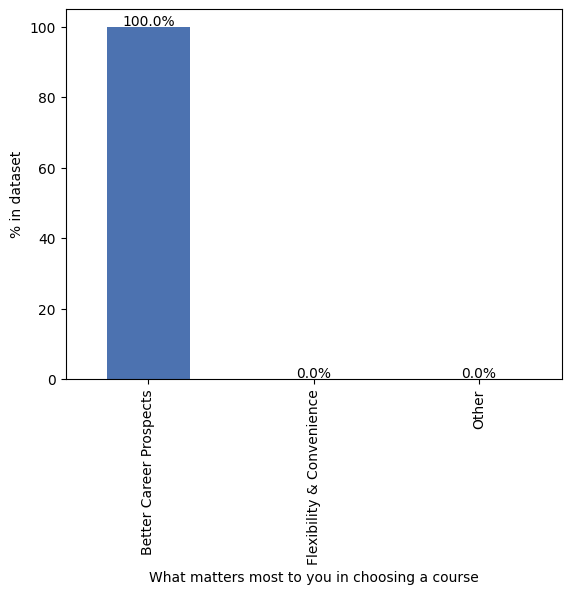

In [ ]:
# An option selected by the customer indicating what is their main motto behind doing this course
percent_plot('What matters most to you in choosing a course')

* Imbalanced data with almost 100% chosed the course for better career prospects. This could be the issue with the answer options or a too strong preference for one option
* There is not much helpful data for lead scoring due to little variance, so we can drop it

In [ ]:
df.drop('What matters most to you in choosing a course', inplace=True, axis=1)

**What is your current occupation**

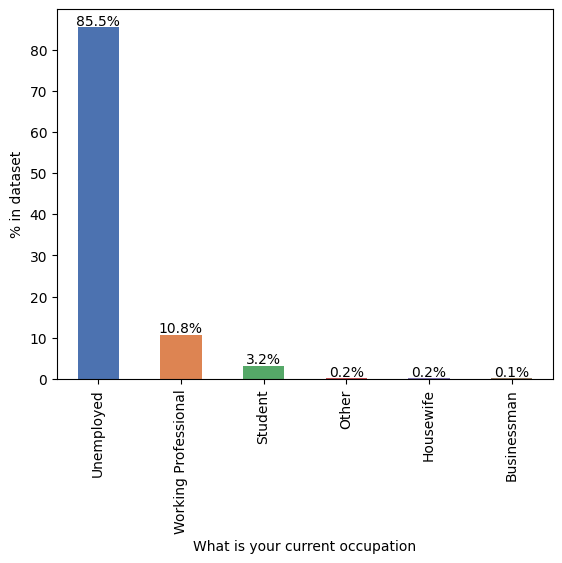

In [ ]:
# Plotting the percent distribution
percent_plot('What is your current occupation')

* Occupation status can be a potential indicator to pursue further education
* It can predict the motivation for the course taking and also the payment ability
* We can see the segmentation of 3 main groups: unemployed, working professional and others
* Suggesting a driver (career change/improvement, upskills) of the targets for lead scoring
* We will regroup the categories, imputing "Unknown" for missing values

In [ ]:
# We will regroup the categories, imputing "Unknown" for missing values
occupation_mapping = {
        'Unemployed': 'Unemployed',
        'Working Professional': 'Working',
        'Student': 'Student',
        'Other': 'Other',
        'Housewife': 'Other',
        'Businessman': 'Working',
        np.nan: 'Unknown'
    }

df['What is your current occupation'] = df['What is your current occupation'].map(occupation_mapping)
# Checking the values after grouping
df['What is your current occupation'].value_counts()

,count
What is your current occupation,
Unemployed,5600
Unknown,2690
Working,714
Student,210
Other,26


**Country**

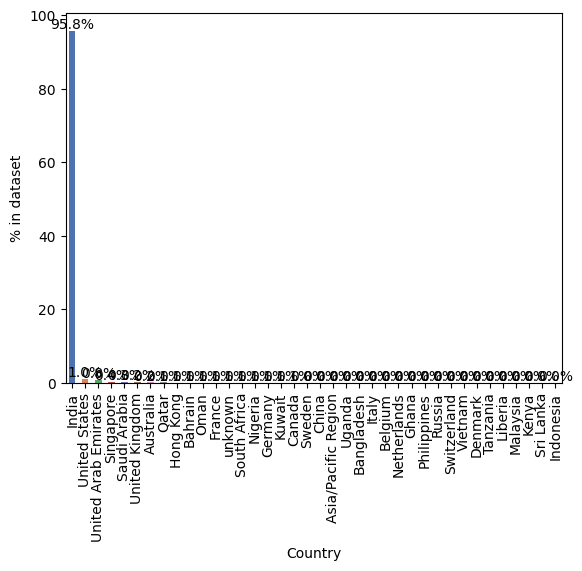

In [ ]:
# Plotting the percent distribution
percent_plot('Country')

* 26% missing values. Most of data centered in India
* Country provides little inference to whether the candidates are potential or not.
* So, we will drop this data

In [ ]:
df.drop('Country', axis=1, inplace=True)

##**Handling the remaining null data <20%**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Number                               9240 non-null   int64  
 1   Lead Origin                               9240 non-null   object 
 2   Lead Source                               9204 non-null   object 
 3   Do Not Email                              9240 non-null   object 
 4   Do Not Call                               9240 non-null   object 
 5   Converted                                 9240 non-null   int64  
 6   TotalVisits                               9103 non-null   float64
 7   Total Time Spent on Website               9240 non-null   int64  
 8   Page Views Per Visit                      9103 non-null   float64
 9   Last Activity                             9137 non-null   object 
 10  Specialization                      

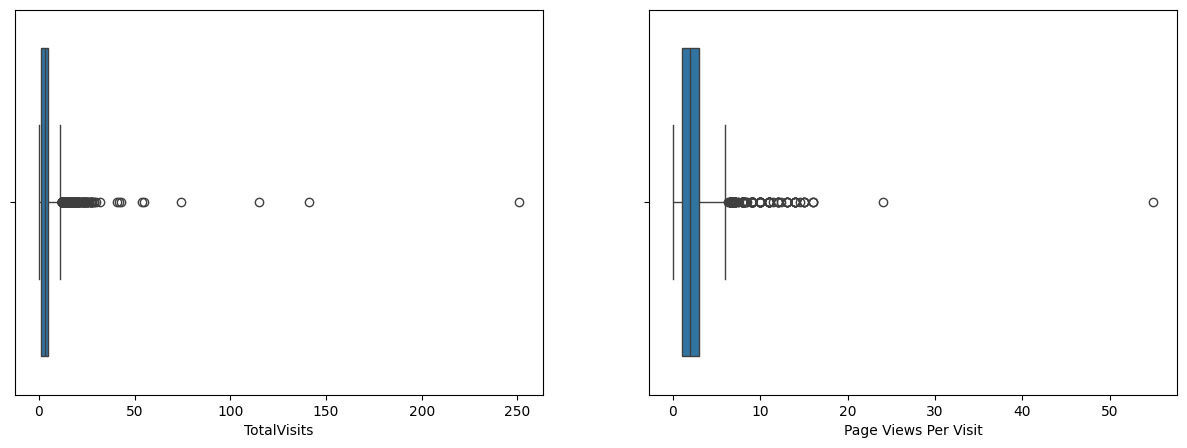

,TotalVisits,Page Views Per Visit
count,9103.000000,9103.000000
mean,3.445238,2.362820
std,4.854853,2.161418
min,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,2.000000
75%,5.000000,3.000000
max,251.000000,55.000000


In [ ]:
# For 'TotalVisits' and 'Page Views Per Visit'
visit_list = ['TotalVisits', 'Page Views Per Visit']
plt.figure(figsize=(15, 5))
for var in visit_list:
    plt.subplot(1,2,visit_list.index(var)+1)
    sns.boxplot(data=df, x=var)
plt.show()

df[visit_list].describe()

* From the above analysis, it can be seen that there is a lot of variation in both of the variables. As the percentage of missing values for both of them are less than 2%, it is better to drop the rows containing missing values.

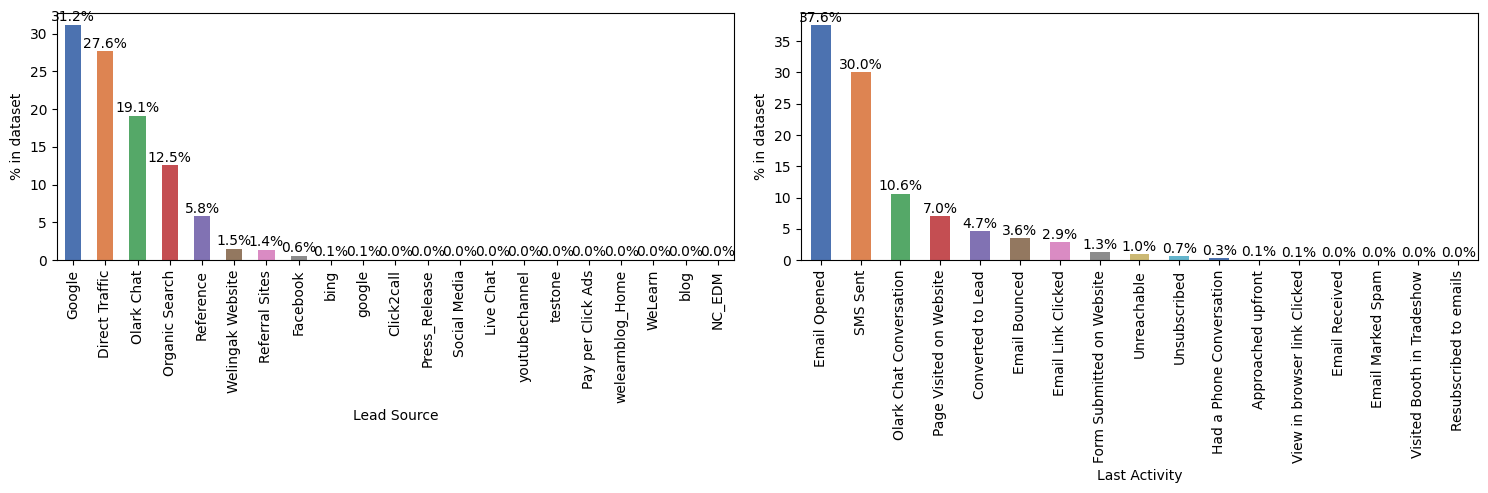

In [ ]:
# For 'Lead Source' and 'Last Activity'
plt.figure(figsize=(15, 5))

# First subplot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
percent_plot('Lead Source')

# Second subplot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
percent_plot('Last Activity')

plt.tight_layout()
plt.show()

In these categorical variables, imputing with the most frequent value is not accurate as the next most frequent value has similar frequency. Also, as these variables have very little missing values, it is better to drop the rows containing these missing values. Hence, we'll drop the rows containing any missing missing values for above four variables.

In [ ]:
# To drop the rows containing missing values
df.dropna(inplace = True)

In [ ]:
# Checking all null data
df.isnull().sum()

,0
Lead Number,0
Lead Origin,0
Lead Source,0
Do Not Email,0
Do Not Call,0
Converted,0
TotalVisits,0
Total Time Spent on Website,0
Page Views Per Visit,0
Last Activity,0


**The data is clean without any missing values**

## **Outlier Treatment for numerical data**

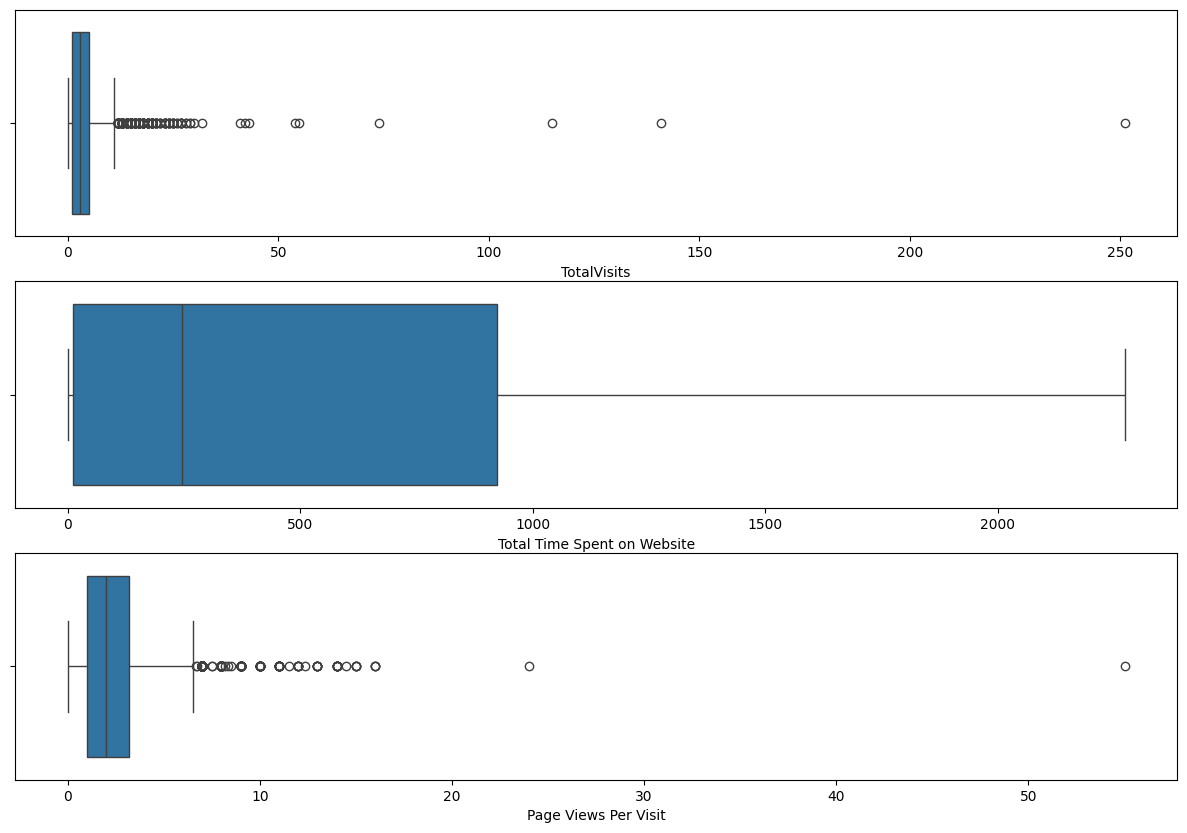

In [ ]:
# Boxplots
num_var = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
plt.figure(figsize=(15, 10))
for var in num_var:
    plt.subplot(3,1,num_var.index(var)+1)
    sns.boxplot(data=df, x=var)
plt.show()

In [ ]:
df[num_var].describe([0.05,.25, .5, .75, .90, .95])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000


#### From the boxplots, we can see that there are outliers present in the variables.
- For 'TotalVisits', the 95% quantile is 10 whereas the maximum value is 251. Hence, we should cap these outliers at 95% value.
- There are no significant outliers in 'Total Time Spent on Website'
- For 'Page Views Per Visit', similar to 'TotalVisits', we should cap outliers at 95% value.

In [ ]:
# Outlier treatment
percentile = df['TotalVisits'].quantile([0.95]).values
df['TotalVisits'][df['TotalVisits'] >= percentile[0]] = percentile[0]

percentile = df['Page Views Per Visit'].quantile([0.95]).values
df['Page Views Per Visit'][df['Page Views Per Visit'] >= percentile[0]] = percentile[0]

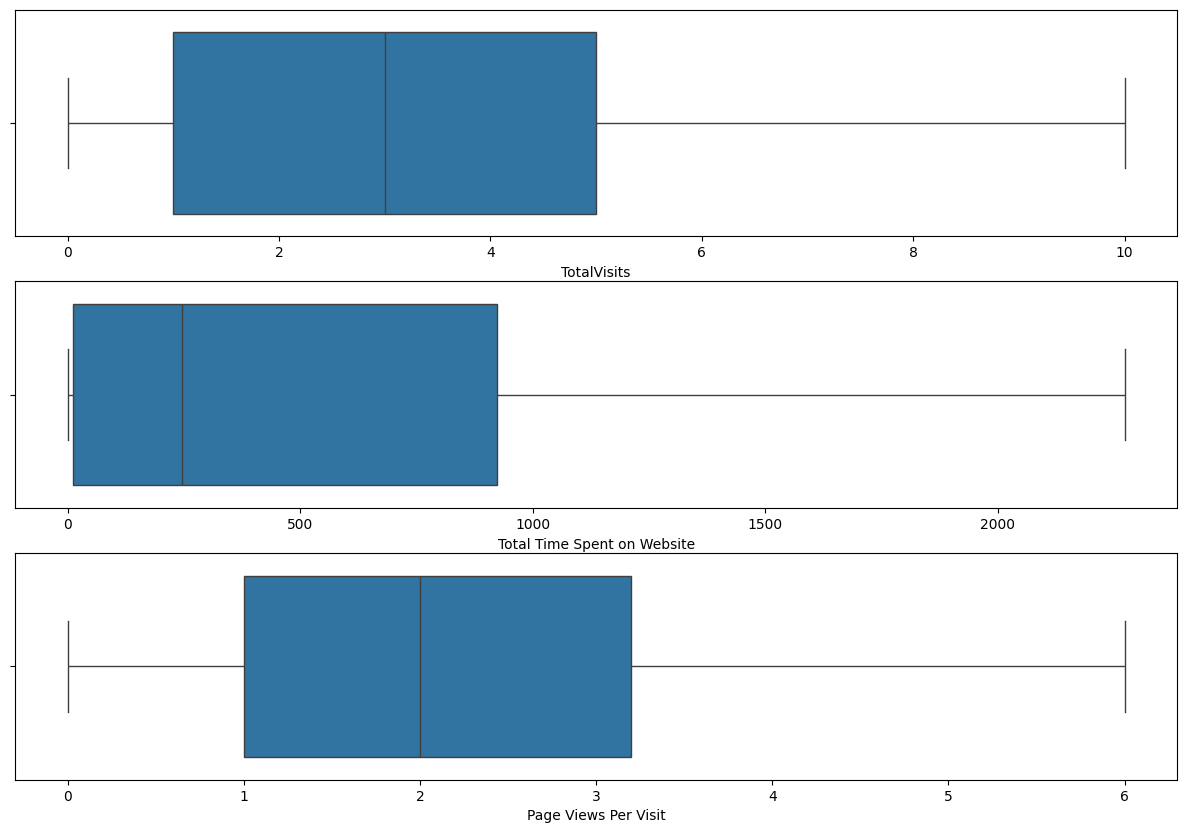

In [ ]:
# Plot Boxplots to verify the treatment
plt.figure(figsize=(15, 10))
for var in num_var:
    plt.subplot(3,1,num_var.index(var)+1)
    sns.boxplot(data=df, x=var)
plt.show()

# **2. EDA**

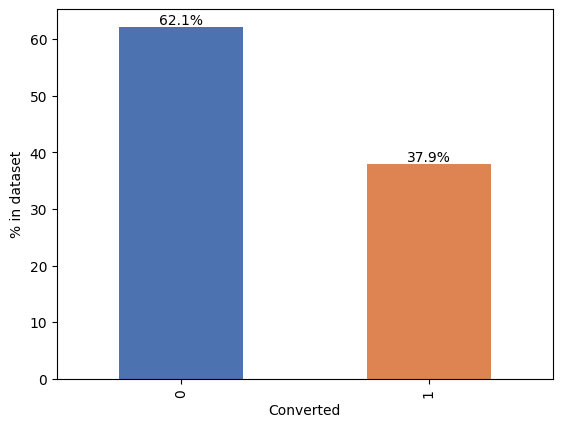

In [ ]:
# For the target variable 'Converted'
percent_plot('Converted')

* **37.9% of the 'Converted' data is 1 ie. 37.9% of the leads are converted. Generally, this is a moderate imbalance dataset.**
* **Logistic Regression can handle this level of imbalance**

## To plot numerical variables against target variable to analyse relations

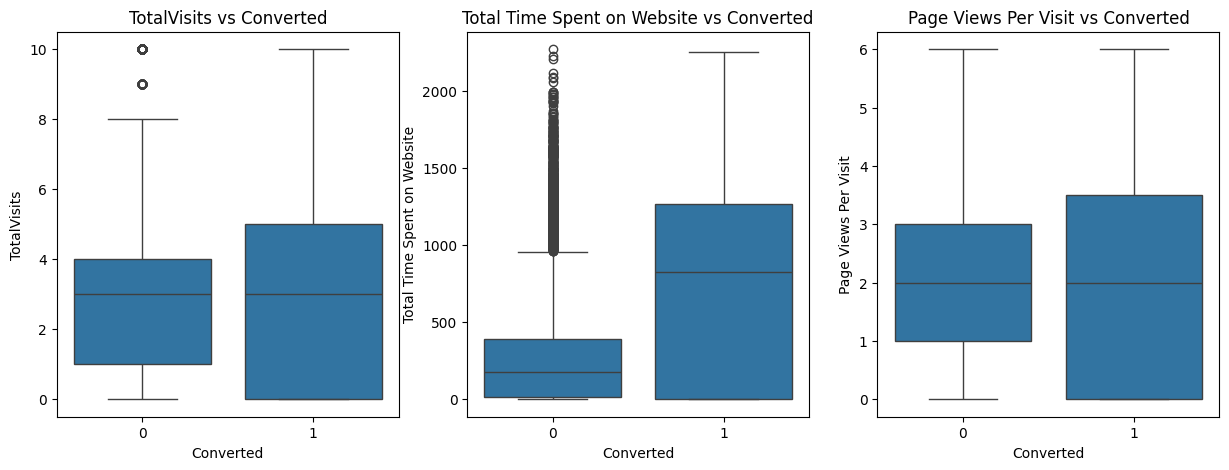

In [ ]:
# To plot the distribution of the numerical data
plt.figure(figsize=(15, 5))
for var in num_var:
    plt.subplot(1,3,num_var.index(var)+1)
    sns.boxplot(y = var , x = 'Converted', data = df)
    plt.title(f'{var} vs Converted')
plt.show()

#### **Observations:**  
* **'TotalVisits' has same median values for both groups. However, converted users are more spreading.**
*   **Converted leads spent significantly higher time on site with a higher median than non-converted group. We also see a larger spreading and fewer outliers in converted group, meaning a certain range of time on site is optimal for converting with certain variance of behavior in this group**
* **'Page Views Per Visit' also has same median values for both groups.**
* **=> We can see that time spent appearing to be a good predictors of conversion**

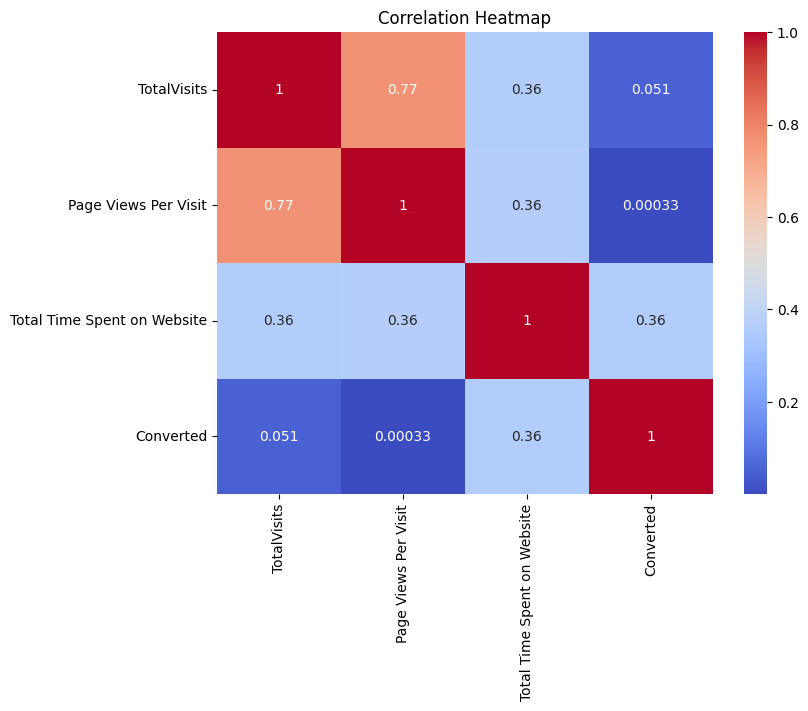

In [ ]:
# Correlation between target variable with numerical data
numeric_cols = ['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website', 'Converted']
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

* **Strong correlation between Total Vistis and Page Views per visit, suggesting that people who visits more frequently also tend to view more pages per visit**
* **Again, time on site has a moderate correlation with "Converted", a good predictive variable for conversion**

# To plot categorial variables against target variable to analyse relations

In [ ]:
# Function to plot the conversion rate for categorial variables
def plot_cat(var,figsize=(15, 6), rotation=45):
  # Create figure and axis
    fig, ax1 = plt.subplots(figsize=figsize)
    ax2 = ax1.twinx()

    order = df[var].value_counts().index

    # Plot counts
    sns.countplot(data=df, x=var, hue='Converted', ax=ax1, order=order)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=rotation, ha='right')
    ax1.set_ylabel('Count')

    # Plot conversion rate
    grouped = df.groupby(var)['Converted'].agg(['sum', 'count'])
    conversion_rates = (grouped['sum'] / grouped['count'] * 100).reindex(order)
    ax2.plot(range(len(conversion_rates)), conversion_rates,
             color='red', marker='o', linewidth=2, markersize=8)
    ax2.set_ylabel('Conversion Rate (%)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Add rate labels
    for i, rate in enumerate(conversion_rates):
        ax2.text(i, rate, f'{rate:.1f}%',
                ha='center', va='bottom', color='red')

    # Legend
    lines1, labels1 = ax1.get_legend_handles_labels()
    ax1.legend(lines1, ['Not Converted', 'Converted'],
              loc='upper right', bbox_to_anchor=(1.13, 1))

    plt.title(f'Conversion Analysis by {var}', pad=20)
    plt.tight_layout()

    return fig, ax1, ax2

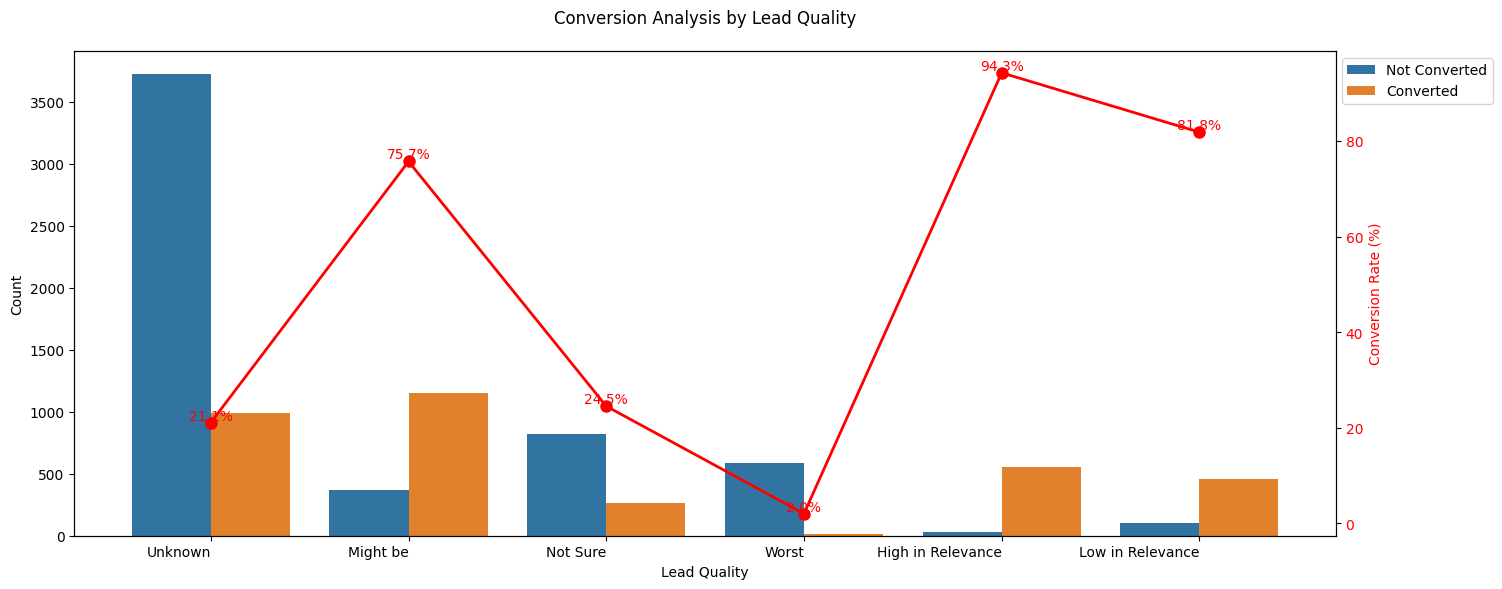

In [ ]:
# Lead Quality
plot_cat('Lead Quality',rotation=0)
plt.show()

*   **"High in Relevance" and "Low in Relevance" leads have the highest conversion rate (~94%), however, they have relatively low volume**
*   **"Unknown" has a high volume, but low conversion rate, suggesting that we should focus on this group for lead targeting**
*   **"Might be" show a strong performance and good balance of volume and conversion rate**





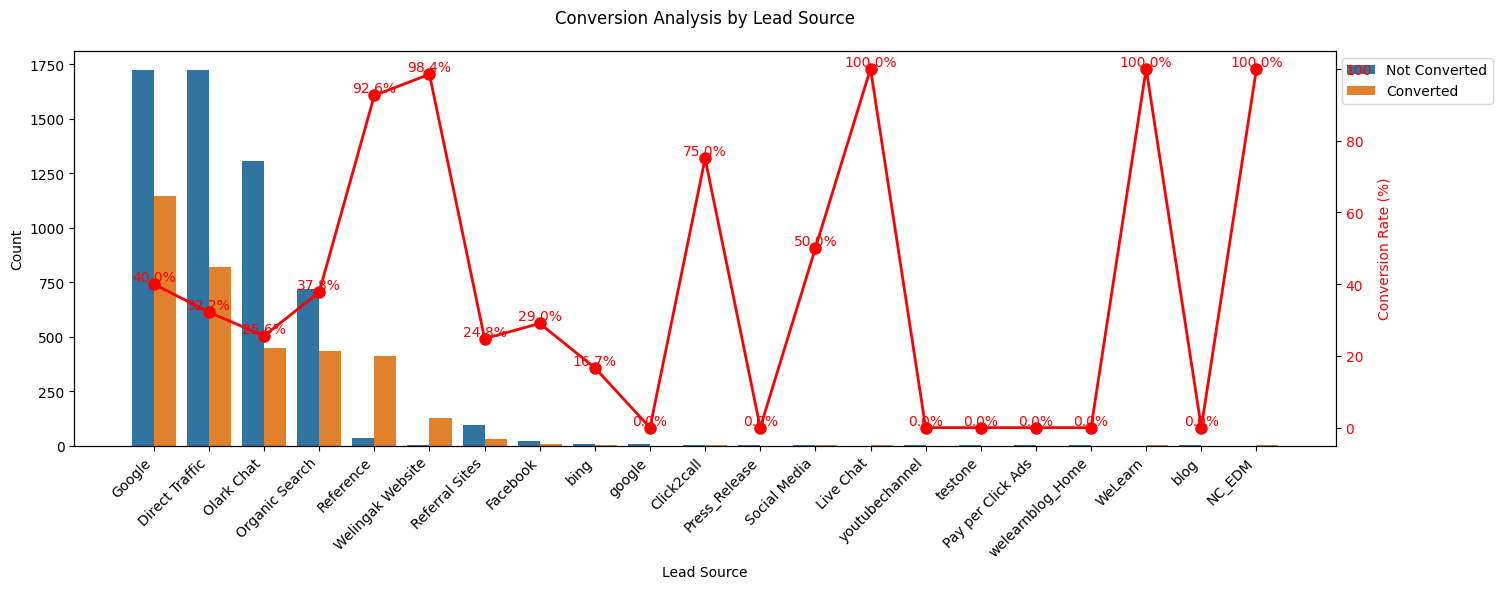

In [ ]:
# Lead Source Distribution
plot_cat('Lead Source')
plt.show()

**Data is scattering into many uncessary categories. We will group relevant data together to create more meaningful analysis**

In [ ]:
# Mapping the categories of Lead Source
source_mapping = {
    'Olark Chat': 'Chat',
    'Live Chat': 'Chat',
    'Organic Search': 'Search',
    'Google': 'Search',
    'google': 'Search',
    'bing': 'Search',
    'Direct Traffic': 'Direct',
    'Referral Sites': 'Referral',
    'Reference': 'Referral',
    'Welingak Website': 'Partner Sites',
    'WeLearn': 'Partner Sites',
    'welearnblog_Home': 'Blog',
    'blog': 'Blog',
    'Facebook': 'Facebook',
    'Social Media': 'Social Media',
    'youtubechannel': 'Youtube',
    'Pay per Click Ads': 'Paid Ads',
    'Click2call': 'Phone',
    'testone': 'Other',
    'Press_Release': 'PR',
    'NC_EDM': 'Email'
}

df['Lead Source'] = df['Lead Source'].map(source_mapping)

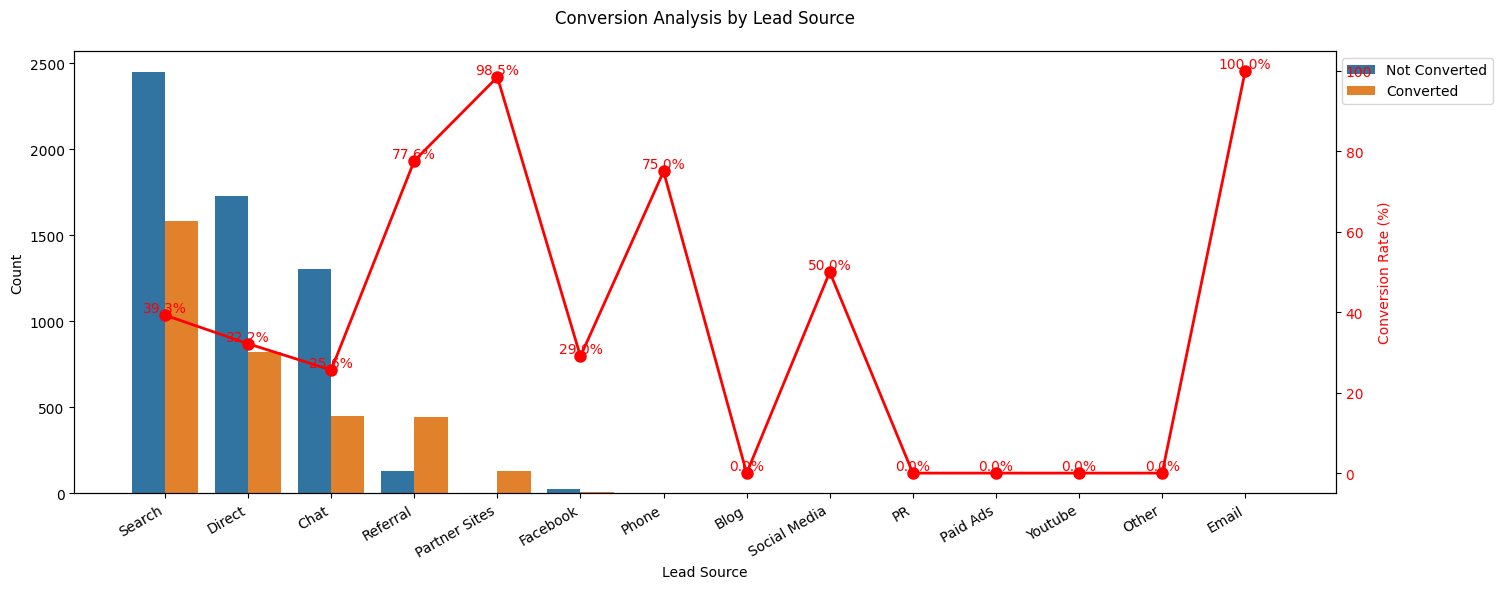

In [ ]:
# Replotting the Lead Source Distribution
plot_cat('Lead Source',rotation=30)
plt.show()

* **High volume sources: search, direct, and chat has most traffic, yet low conversion rate**
* **Referral marketing from parter sites, referral programs shows a strong conversion rate because they are more trusted sources**
* **Digital marketing channels, except Social Media and Facebook, have a very poor result**

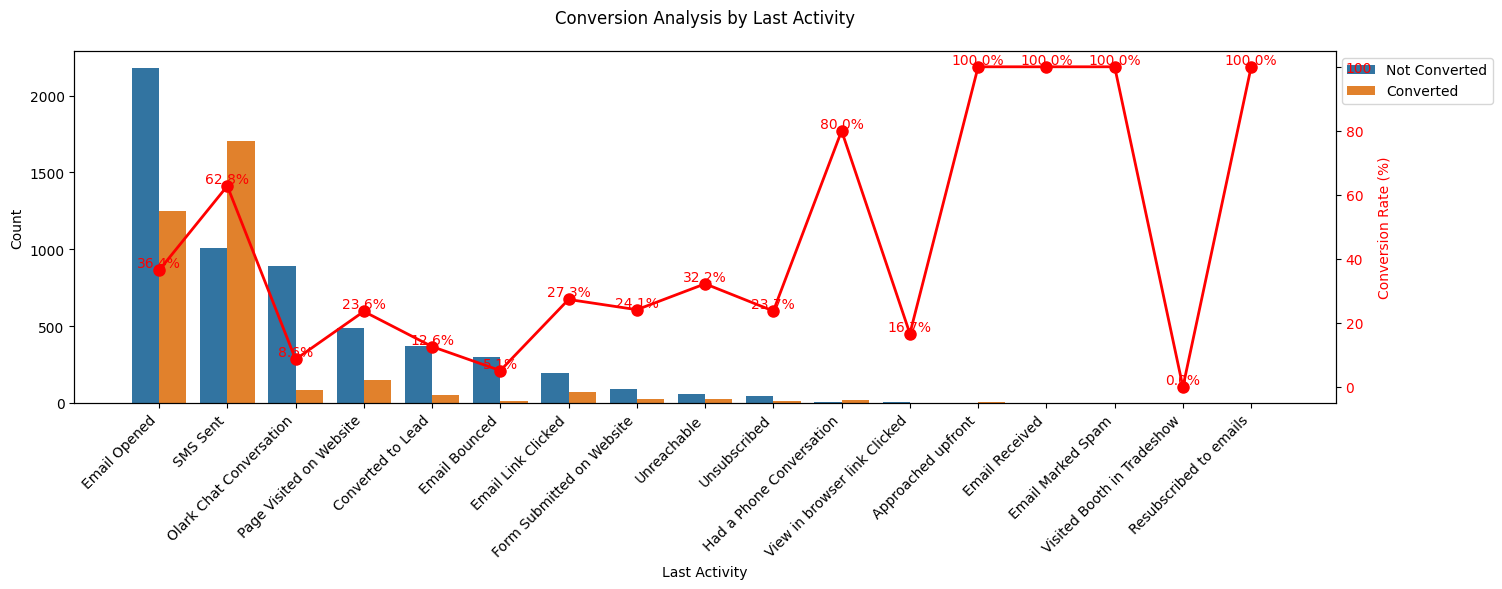

In [ ]:
# Last Activity Distribution
plot_cat('Last Activity')
plt.show()

* **Highest number of lead are generated where the last activity is 'Email Opened', 'SMS Sent' and 'Chat Conversation', out of which, SMS is better conversion rate.**
* **Others have too low volume to evaluate the conversion rate properly**
* **"Page Visited on website" is a good indicator for early stage interaction with 23% converted**

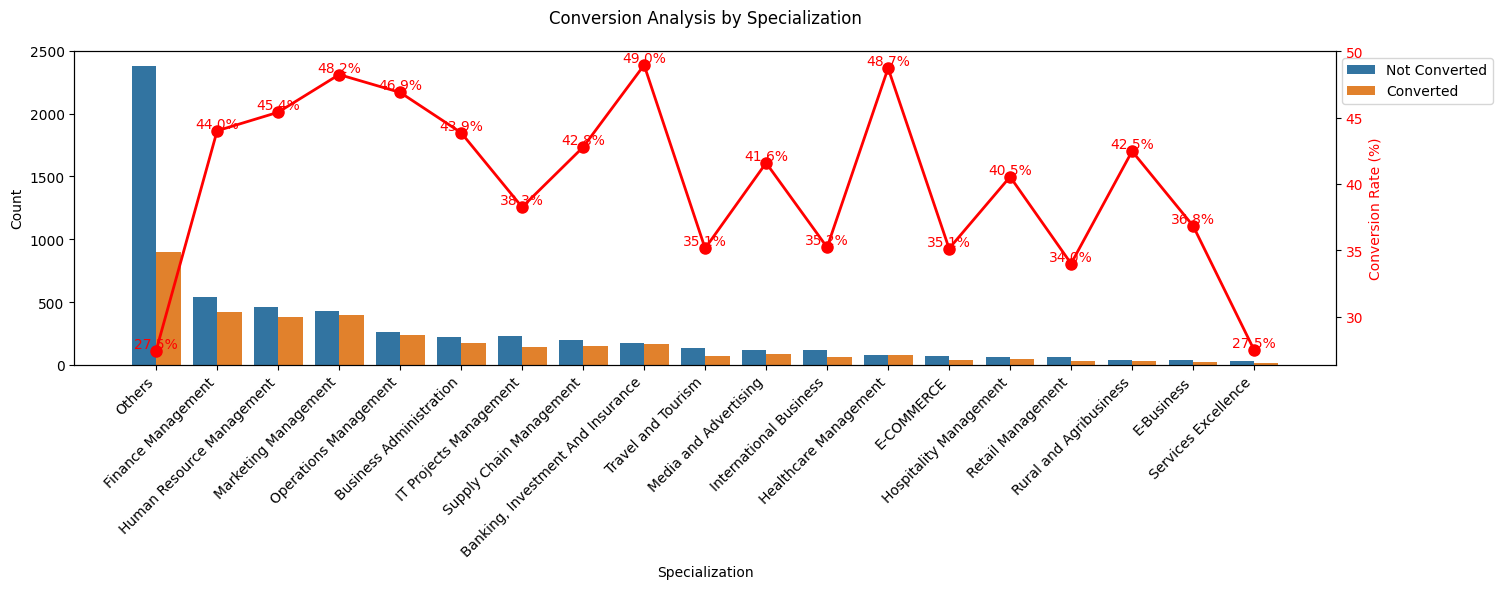

In [ ]:
# Specialization Distribution
plot_cat('Specialization')
plt.show()

* **"Others" has highest volume but lowest conversion rate while most specialised fields have relatively low volumes, but higher conversion rates**
* **Suggesting that if we can develope strategies to categorize these leads into specific specializations, helping us to improve overall conversion by better classification**

# **3. Data preprocessing for modeling**

**Encoding Binary Variables**

In [ ]:
df.head(2)

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,Asymmetrique Activity Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No,No,No,No,No,No,No,No,Active_Lead,Low in Relevance,No,No,Mumbai,02.Medium,No,No,Modified
1,660728,API,Search,No,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,No,No,No,No,No,No,No,No,Active_Lead,Unknown,No,No,Mumbai,02.Medium,No,No,Email Opened


In [ ]:
# There are several numerical binary variable is defined as object with Yes/No, we will convert into 1/0 values
binary_cols = ['Do Not Email','Do Not Call','Search','Magazine','Newspaper Article',
               'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
               'Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content',
               'I agree to pay the amount through cheque','A free copy of Mastering The Interview']
df[binary_cols] = df[binary_cols].apply(lambda x: x.map({'Yes': 1, 'No': 0}))

**Encoding Categorical Variables**

In [ ]:
# Asymmetrique Activity Index

# Replacing the null values with '4' and High with 1, Medium with 2 and Low with 3
map_list = {'01.High':1,'02.Medium':2,'03.Low':3, 'Unknown':4}
df['Asymmetrique Activity Index'] = df['Asymmetrique Activity Index'].map(map_list)

# Checking the values after mapping
df['Asymmetrique Activity Index'].value_counts()

,count
Asymmetrique Activity Index,
4,4153
2,3739
1,820
3,362


In [ ]:
# get the list of all objects cols for encoding
objectcols = ['Lead Origin', 'Lead Source', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags',
       'Lead Quality', 'City', 'Last Notable Activity']
objectcols


['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'Lead Quality',
 'City',
 'Last Notable Activity']

In [ ]:
# Convert to dummy variables
df = pd.get_dummies(df, columns=objectcols, drop_first=True).astype(int)

In [ ]:
df.head(2)

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Asymmetrique Activity Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Chat,Lead Source_Direct,Lead Source_Email,Lead Source_Facebook,Lead Source_Other,Lead Source_PR,Lead Source_Paid Ads,Lead Source_Partner Sites,Lead Source_Phone,Lead Source_Referral,Lead Source_Search,Lead Source_Social Media,Lead Source_Youtube,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working,Tags_Contact_Issue,Tags_Current_Student,Tags_Lost_Closed,Tags_Not_Interested,Tags_Others,Tags_Unknown,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Unknown,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,0,0,0,5,674,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Split the train and test set
X = df.drop('Converted', axis=1)
y = df['Converted']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=50)

In [ ]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
X_train.head(2)

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Asymmetrique Activity Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Chat,Lead Source_Direct,Lead Source_Email,Lead Source_Facebook,Lead Source_Other,Lead Source_PR,Lead Source_Paid Ads,Lead Source_Partner Sites,Lead Source_Phone,Lead Source_Referral,Lead Source_Search,Lead Source_Social Media,Lead Source_Youtube,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working,Tags_Contact_Issue,Tags_Current_Student,Tags_Lost_Closed,Tags_Not_Interested,Tags_Others,Tags_Unknown,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Unknown,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7811,589885,0,0,2,949,2,0,0,0,0,0,0,0,0,0,0,2,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6959,596270,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
# Transform the numerical cols using Min Max Scaler
numeric_cols = ['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']
scaler = MinMaxScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols]  = scaler.transform(X_test[numeric_cols])
X_train.head(2)

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Asymmetrique Activity Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Chat,Lead Source_Direct,Lead Source_Email,Lead Source_Facebook,Lead Source_Other,Lead Source_PR,Lead Source_Paid Ads,Lead Source_Partner Sites,Lead Source_Phone,Lead Source_Referral,Lead Source_Search,Lead Source_Social Media,Lead Source_Youtube,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working,Tags_Contact_Issue,Tags_Current_Student,Tags_Lost_Closed,Tags_Not_Interested,Tags_Others,Tags_Unknown,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Unknown,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7811,589885,0,0,0.2,0.417694,0.333333,0,0,0,0,0,0,0,0,0,0,2,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6959,596270,0,0,0.0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
# Using Lead Number as Indexing for y_train, y_test
y_train.index = X_train['Lead Number']
y_test.index = X_test['Lead Number']

# Dropping Lead Number from the feature data, that not relevant for modeling
X_train.drop('Lead Number', axis=1, inplace=True)
X_test.drop('Lead Number', axis=1, inplace=True)

# Reset indexing
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

In [ ]:
X_train.head(2)

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Asymmetrique Activity Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Chat,Lead Source_Direct,Lead Source_Email,Lead Source_Facebook,Lead Source_Other,Lead Source_PR,Lead Source_Paid Ads,Lead Source_Partner Sites,Lead Source_Phone,Lead Source_Referral,Lead Source_Search,Lead Source_Social Media,Lead Source_Youtube,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working,Tags_Contact_Issue,Tags_Current_Student,Tags_Lost_Closed,Tags_Not_Interested,Tags_Others,Tags_Unknown,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Unknown,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.2,0.417694,0.333333,0,0,0,0,0,0,0,0,0,0,2,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0.0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
y_train.head(2)

,Converted
Lead Number,
589885,0
596270,0


# **4. Build models using Logistic Regression**

**Feature selection**

In [ ]:
# Create RFE with 15 significant features
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

# Create a dataframe of features and their ranking (1 means selected)
feature_ranking = pd.DataFrame({
    'Feature': X_train.columns,
    'Selected': rfe.support_,
    'Ranking': rfe.ranking_
    })

# Print feature ranking
feature_ranking = feature_ranking.sort_values('Ranking')
print(feature_ranking.head(20))

# Get selected features
selected_features = X_train.columns[rfe.support_]

# Create new X_train with selected features only
X_train_rfe = X_train[selected_features]

                                     Feature  Selected  Ranking
0                               Do Not Email      True        1
82                        Lead Quality_Worst      True        1
81                      Lead Quality_Unknown      True        1
80                     Lead Quality_Not Sure      True        1
70   What is your current occupation_Unknown      True        1
28                 Lead Source_Partner Sites      True        1
72                        Tags_Contact_Issue      True        1
71   What is your current occupation_Working      True        1
74                          Tags_Lost_Closed      True        1
75                       Tags_Not_Interested      True        1
3                Total Time Spent on Website      True        1
76                               Tags_Others      True        1
77                              Tags_Unknown      True        1
73                      Tags_Current_Student      True        1
19                 Lead Origin_Lead Add 

**Building the model with selected features**

In [ ]:
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm

# Function to build a Logistic regression model
def model(X_train, y_train):
    # Adding constant to X_train
    X_train_sm = add_constant(X_train)
    # Reshape y_train to have a single column
    y_train = y_train.values.reshape(-1, 1)
    # Using logistic regression
    model = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()).fit()
    return model

In [ ]:
# Function to check VIF of the model
def vif(df):
  vif = pd.DataFrame()
  vif['Features'] = df.columns
  vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by = "VIF", ascending = False)
  print(vif)

In [ ]:
y_train = pd.DataFrame(y_train)

# Building the first model
model1 = model(X_train_rfe, y_train)
print(model1.summary())
print(vif(X_train_rfe))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7243
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2551.9
Date:                Sun, 16 Mar 2025   Deviance:                       5103.8
Time:                        20:27:30   Pearson chi2:                 8.31e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4641
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

**We will drop the Tags_Unknown variable with a high VIF 6.09**

In [ ]:
X_train_rfe_2 = X_train_rfe.drop('Tags_Unknown', axis=1)

# Building the second model
model2 = model(X_train_rfe_2, y_train)
print(model2.summary())
print(vif(X_train_rfe_2))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7244
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2663.3
Date:                Sun, 16 Mar 2025   Deviance:                       5326.7
Time:                        20:27:30   Pearson chi2:                 7.56e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4474
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

**All the model summary statistics show a good performance with all parameters' VIF under 5 and significant p-value**

# **5. Model evaluation**

##**ROC Curve**

In [ ]:
y_train.head()

,Converted
Lead Number,
589885,0
596270,0
649597,0
604385,0
629524,1


In [ ]:
y_train = pd.DataFrame(y_train, columns=['Converted'])

In [ ]:
# Getting the predicted values on the train set
X_train_sm = add_constant(X_train_rfe_2)
y_train_pred = model2.predict(X_train_sm)

# Creating a dataframe of the predicted conversion and actual conversion
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = y_train.copy()
y_train_pred_final['Converted'] = y_train['Converted']
y_train_pred_final['Conversion_Prob'] = y_train_pred

# Creating new column 'predicted' with 1 if Conversion_Prob > 0.4 (the optimal threshold) else 0
y_train_pred_final['Predicted'] = y_train_pred_final['Conversion_Prob'].map(lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
Lead Number,,,
589885,0,0.322255,0
596270,0,0.553402,1
649597,0,0.156376,0
604385,0,0.094496,0
629524,1,0.930509,1


In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

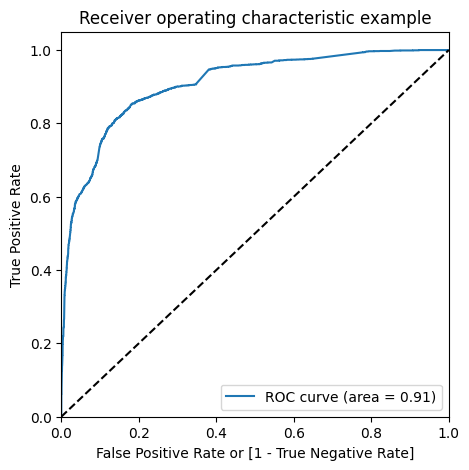

In [ ]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

**Model Performance:**
*   **AUC = 0.91 indicates excellent discriminative ability of the model**
*   **Curve far above diagonal = model significantly outperforms random classification**

##**Optimal cut-off**

In [ ]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
Lead Number,,,,,,,,,,,,,
589885,0,0.322255,0,1,1,1,1,0,0,0,0,0,0
596270,0,0.553402,1,1,1,1,1,1,1,0,0,0,0
649597,0,0.156376,0,1,1,0,0,0,0,0,0,0,0
604385,0,0.094496,0,1,0,0,0,0,0,0,0,0,0
629524,1,0.930509,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
# Calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.378702  1.000000  0.000000
0.1   0.1  0.662075  0.965078  0.477384
0.2   0.2  0.789227  0.891233  0.727051
0.3   0.3  0.831519  0.851946  0.819069
0.4   0.4  0.841025  0.800655  0.865632
0.5   0.5  0.841851  0.758458  0.892683
0.6   0.6  0.821187  0.655511  0.922173
0.7   0.7  0.820085  0.588214  0.961419
0.8   0.8  0.806309  0.531466  0.973836
0.9   0.9  0.758920  0.383776  0.987583


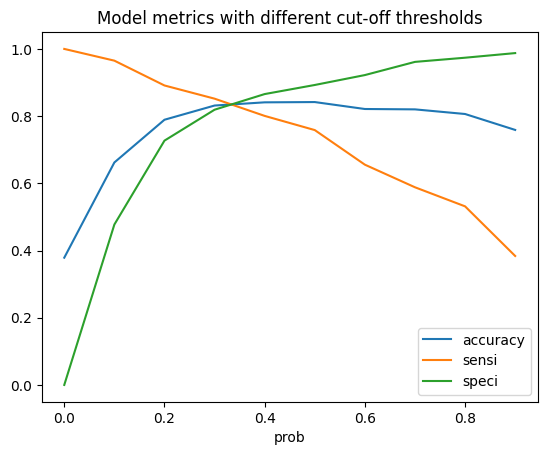

In [ ]:
# Plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.title('Model metrics with different cut-off thresholds')
plt.show()

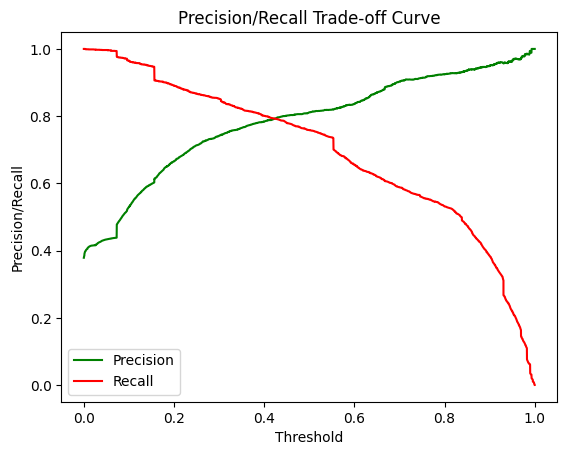

In [ ]:
# Plotting the precision and recall trade off
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)
plt.plot(thresholds, p[:-1], "g-", label='Precision')
plt.plot(thresholds, r[:-1], "r-", label='Recall')
plt.xlabel("Threshold")
plt.ylabel("Precision/Recall")
plt.title("Precision/Recall Trade-off Curve")
plt.legend()
plt.show()

**From both plots, we can see that the threshold 0.4 gives a balance between identifying true positives while minimizing false positives and false negatives**

## **Confusion metrics**

Model accuracy: 0.8410249345639895
--------------------
Overall model metrix:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      4510
           1       0.78      0.80      0.79      2749

    accuracy                           0.84      7259
   macro avg       0.83      0.83      0.83      7259
weighted avg       0.84      0.84      0.84      7259

--------------------


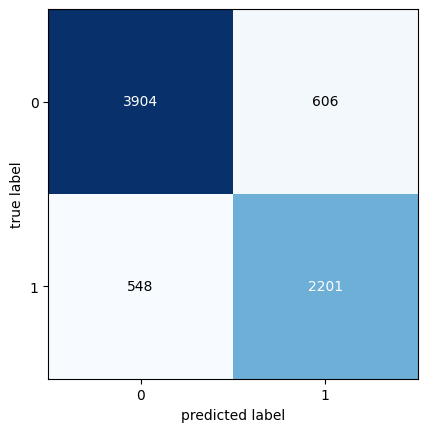

Model sensitivity: 0.8006547835576573
--------------------
Model specificity: 0.8656319290465632
--------------------
Model FPR: 0.1343680709534368
--------------------
Model precision: 0.7841111506946918
--------------------
Model negative_prediction: 0.8769092542677448
--------------------
Model F1_score: 0.7922966162706983
--------------------


In [ ]:
from sklearn import metrics
# Check the overall accuracy
accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(f'Model accuracy: {accuracy}\n{"--"*10}')

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print(f'Overall model metrix:\n{metrics.classification_report(y_train_pred_final.Converted, y_train_pred_final.Predicted)}\n{"--"*10}')

# To plot confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=confusion)
plt.show()

# Calculatethe sensitivity
sensitivity = TP / float(TP+FN)
print(f'Model sensitivity: {sensitivity}\n{"--"*10}')

# Calculate specificity
specificity = TN / float(TN+FP)
print(f'Model specificity: {specificity}\n{"--"*10}')

# Calculate false postive rate
FPR = FP/ float(TN+FP)
print(f'Model FPR: {FPR}\n{"--"*10}')

# Calculate precision value (Positive predictive value)
precision = TP / float(TP+FP)
print(f'Model precision: {precision}\n{"--"*10}')

# Calculate Negative predictive value
negative_prediction = TN / float(TN+ FN)
print(f'Model negative_prediction: {negative_prediction}\n{"--"*10}')

# Calculate F1-score
F1_score = 2 * precision*sensitivity / (precision + sensitivity)
print(f'Model F1_score: {F1_score}\n{"--"*10}')

**The model performs well overall with balanced metrics with strong accuracy of 84%, showing better performance on Non-converted leads (Class 0: f1-score 87% compared to 79% of Class 1)) and strong ability to avoid false positives.**

##**Making prediction on the test set**

In [ ]:
y_test.head()

,Converted
Lead Number,
613339,0
628347,1
610339,0
609859,1
585386,0


In [ ]:
y_test = pd.DataFrame(y_test, columns=['Converted'])

In [ ]:
# Adding constant to X_test
X_test_sm = sm.add_constant(X_test[X_train_rfe_2.columns])
# Making predictions on the test set
y_test_pred = model2.predict(X_test_sm)

# Converting y_pred to a dataframe which is an array
y_test_pred = pd.DataFrame(y_test_pred)

y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred_final = y_test.copy()
y_test_pred_final['Converted'] = y_test['Converted']
y_test_pred_final['Conversion_Prob'] = y_test_pred

# Creating new column 'predicted' with 1 if Conversion_Prob > 0.4 (the optimal threshold) else 0
y_test_pred_final['Predicted'] = y_test_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.4 else 0)

# Checking the prediction on test set
y_test_pred_final.head()

,Converted,Conversion_Prob,Predicted
Lead Number,,,
613339,0,0.156376,0
628347,1,0.929964,1
610339,0,0.073008,0
609859,1,0.478200,1
585386,0,0.001718,0


Model accuracy: 0.8396694214876033
--------------------
Overall model metrix:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87      1129
           1       0.77      0.82      0.79       686

    accuracy                           0.84      1815
   macro avg       0.83      0.84      0.83      1815
weighted avg       0.84      0.84      0.84      1815

--------------------


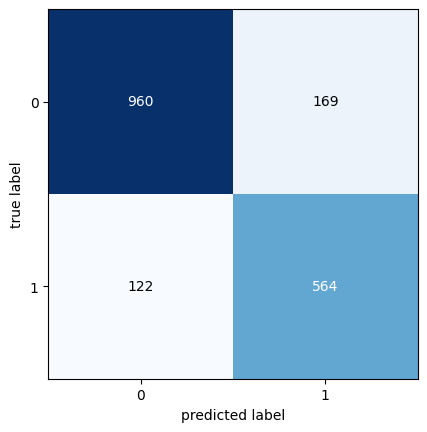

Model sensitivity: 0.8221574344023324
--------------------
Model specificity: 0.8503100088573959
--------------------
Model FPR: 0.14968999114260406
--------------------
Model precision: 0.7694406548431105
--------------------
Model negative_prediction: 0.8872458410351202
--------------------
Model F1_score: 0.7949260042283298
--------------------


In [ ]:
# Let's check the overall accuracy.
accuracy2 = metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.Predicted)
print(f'Model accuracy: {accuracy2}\n{"--"*10}')

confusion2 = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.Predicted)
TP2 = confusion2[1,1] # true positive
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

print(f'Overall model metrix:\n {metrics.classification_report(y_test_pred_final.Converted, y_test_pred_final.Predicted)}\n{"--"*10}')

# To plot confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=confusion2)
plt.show()

# Calculatethe sensitivity
sensitivity2 = TP2 / float(TP2+FN2)
print(f'Model sensitivity: {sensitivity2}\n{"--"*10}')

# Calculate specificity
specificity2 = TN2 / float(TN2+FP2)
print(f'Model specificity: {specificity2}\n{"--"*10}')

# Calculate false postive rate
FPR2 = FP2/ float(TN2+FP2)
print(f'Model FPR: {FPR2}\n{"--"*10}')

# Calculate precision value (Positive predictive value)
precision2 = TP2 / float(TP2+FP2)
print(f'Model precision: {precision2}\n{"--"*10}')

# Calculate Negative predictive value
negative_prediction2 = TN2 / float(TN2+ FN2)
print(f'Model negative_prediction: {negative_prediction2}\n{"--"*10}')

# Calculate F1-score
F1_score2 = 2 * precision2*sensitivity2 / (precision2 + sensitivity2)
print(f'Model F1_score: {F1_score2}\n{"--"*10}')


**The model performs consistently on the test set with the accuracy of 83.9%**

# **6. Conclusion**



In [ ]:
# Create the metrics DataFrame to compare train and test set performance
metrics_data = {
    'Dataset': ['Train', 'Test'],
    'Accuracy': [accuracy, accuracy2],
    'Sensitivity': [sensitivity, sensitivity2],
    'Specificity': [specificity, specificity2],
    'Precision': [precision, precision2],
    'False Positive Rate': [FPR, FPR2],
    'Negative Predictive Rate': [negative_prediction, negative_prediction2],
    'F1-score': [F1_score, F1_score2],
}

metrics_df = pd.DataFrame(metrics_data)
metrics_df.set_index('Dataset', inplace=True)
metrics_df = metrics_df.round(3)
print('Model Performance on Train data vs. Test data performance', '\n','-'*115,'\n', metrics_df)

Model Performance on Train data vs. Test data performance 
 ------------------------------------------------------------------------------------------------------------------- 
          Accuracy  Sensitivity  Specificity  Precision  False Positive Rate  Negative Predictive Rate  F1-score
Dataset                                                                                                        
Train       0.841        0.801        0.866      0.784                0.134                     0.877     0.792
Test        0.840        0.822        0.850      0.769                0.150                     0.887     0.795


* **Excellent predictive power with 84.1% accuracy and 0.91 AUC score, demonstrating strong capability in distinguishing between converting and non-converting leads**
* **Model shows outstanding stability with nearly identical performance between training (84.1%) and test sets (83.9%), confirming reliable real-world applicability**
* **Optimal prediction threshold established at 0.4, providing balanced predictions for practical business use**
* **Successfully handles class imbalance while maintaining consistent performance, making it reliable for various lead scenarios**
* **Model demonstrates strong generalization without overfitting, ensuring dependable predictions on new data**

## Create the Lead Score Final Dataframe

In [ ]:
# Create a full dataset with predicted Lead Score from 0 to 100
y_final = pd.concat([y_train_pred_final[['Conversion_Prob']], y_test_pred_final[['Conversion_Prob']]], axis=0)
y_final['Lead Score'] = round(y_final['Conversion_Prob'] * 100,0).astype(int)
y_final.head()

,Conversion_Prob,Lead Score
Lead Number,,
589885,0.322255,32
596270,0.553402,55
649597,0.156376,16
604385,0.094496,9
629524,0.930509,93


## Feature Importance of the model

In [ ]:
# Create the dataframe for feature coef
params = pd.DataFrame({
    'Coefficient': model2.params.values,
    'P-value': model2.pvalues
})
params['Importance'] = 100.0 * (abs(params['Coefficient']) / abs(params['Coefficient']).max())
params = params.round({
    'Coefficient': 2,
    'P-value': 4,  # P-values often need more decimal places
    'Importance': 2
})
params = params.sort_values('Coefficient', ascending=False)
params.head(20)

,Coefficient,P-value,Importance
Lead Source_Partner Sites,3.86,0.0002,100.00
Total Time Spent on Website,3.59,0.0000,93.16
Lead Origin_Lead Add Form,2.38,0.0000,61.72
What is your current occupation_Working,1.43,0.0000,37.10
Tags_Lost_Closed,0.86,0.0000,22.25
const,0.21,0.0060,5.56
What is your current occupation_Unknown,-0.86,0.0000,22.20
Do Not Email,-1.06,0.0000,27.46
Lead Quality_Unknown,-1.90,0.0000,49.27
Lead Quality_Not Sure,-2.46,0.0000,63.75


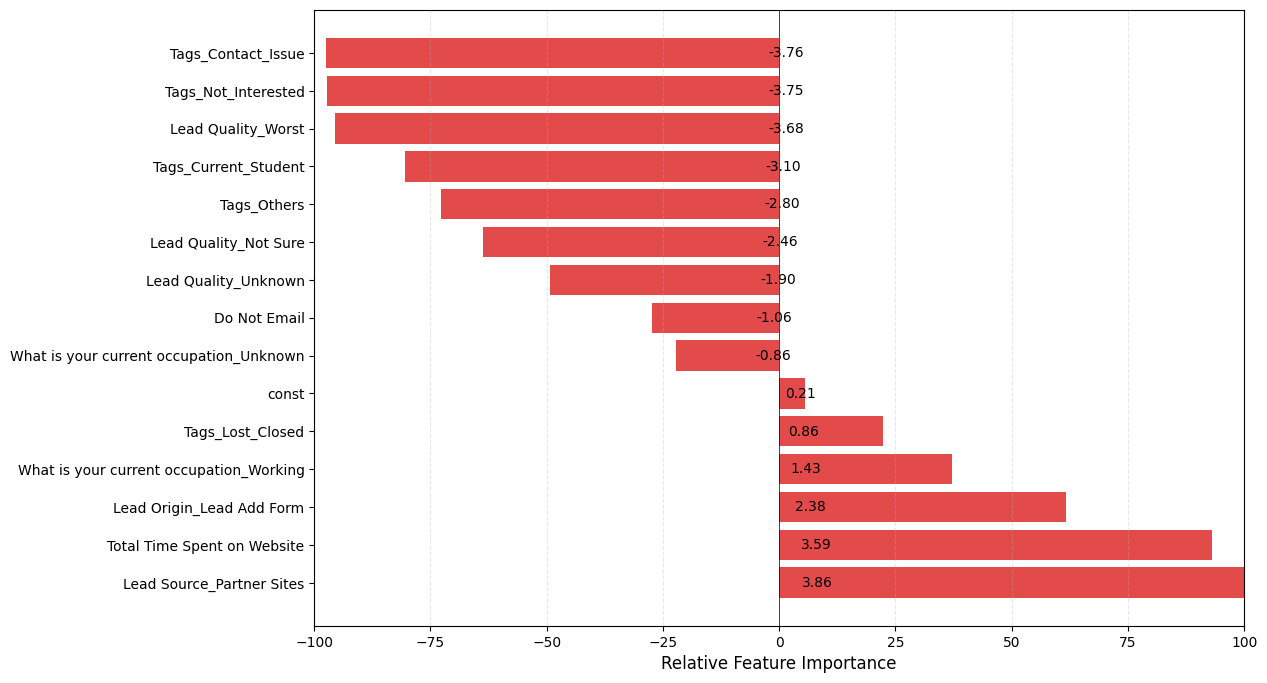

In [ ]:
# Create separate DataFrames for positive and negative values
positive_params = params[params['Coefficient'] > 0].sort_values('Importance', ascending=False)
negative_params = params[params['Coefficient'] < 0].sort_values('Importance', ascending=True)
sorted_params = pd.concat([positive_params, negative_params])

# Create the plot
plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_params)),
         sorted_params['Importance']*np.sign(sorted_params['Coefficient']),
         color='#E34B4B')
plt.xlabel('Relative Feature Importance', fontsize=12)
plt.yticks(range(len(sorted_params)), sorted_params.index, fontsize=10)

# Add vertical line at x=0
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)

# Add value labels on the bars
for i, v in enumerate(sorted_params['Coefficient']):
    # Position text differently for positive and negative values
    if sorted_params['Coefficient'].iloc[i] > 0:
        plt.text(v + 1, i, f'{v:.2f}', va='center')
    else:
        plt.text(-v - 6, i, f'{v:.2f}', va='center')

# Add grid
plt.grid(axis='x', linestyle='--', alpha=0.3)

# Set x-axis limits symmetrically
plt.xlim(-100, 100)

plt.show()

**Total 14 features:**
* Key Positive Predictors (increasing conversion probability):
1. Lead Source_Partner Sites (3.86): Highest positive coefficient, as we can see from the above analysis, partnership is a reliable channel that gives more trust and credibility to users to enrol in the courses
2. Total Time Spent on Website (3.59): Strong positive impact. The model fits with our EDA insights which suggest a strong correlation between the conversion rate average time the users spend on the website
3. Lead Origin_Lead Add Form (2.38): Strong positive influence, clearly, filling the form is a strong indicator of the users' interest in the courses

* Key Negative Predictors (decreasing conversion probability):
1. Tags_Contact_Issue (-3.76): Strong negative effect. Not being able to contact the leads, is a strongindicator that they don't want to be further communicated about the courses
2. Tags_Not_Interested (-3.75): Strong negative influence. As tagged by employees, users strongly expressed the disinterest in the courses
3. Lead Quality_Worst (-3.68): Strong negative impact. This lead quality criteria shows relevancy to the conversion quality


